# 2016美国大选

In [1]:
# 引入必要的库
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#数据文件地址
filename = './presidential_polls.csv'

* 列名预处理

In [2]:
# 读取列名，即第一行数据
with open(filename,'r') as f:
    col_names_str = f.readline()[:-1]  #[:-1]表示不读取微末的换行符‘/n’
    
#将字符串拆分，并组成列表
col_name_lst = col_names_str.split(',')

#使用的列名
use_col_name_lst = ['enddate', 'rawpoll_clinton', 'rawpoll_trump', 'adjpoll_clinton', 'adjpoll_trump']

#获取相应列名的索引号
use_col_index_lst = [col_name_lst.index(use_col_name) for use_col_name in use_col_name_lst ]

* 数据读取

data_array = np.loadtxt(filename,
                       delimiter=',',
                       skiprows=1,
                       dtype=str,
                       usecols=use_col_index_lst)

print data_array, data_array.shape

* 数据处理

In [4]:
# 处理日期格式数据
enddate_idx = use_col_name_lst.index('enddate')
enddate_lst = data_array[:,enddate_idx].tolist()


# 将日期字符串格式统一，即‘yy/dd/mm’
enddate_lst = [enddate.replace('-','/') for enddate in enddate_lst]

# 将日期字符串转换为日期
date_lst = [datetime.datetime.strptime(enddate, '%m/%d/%Y') for enddate in enddate_lst]

# 构造年份-月份列表
month_lst = ['%d-%02d' %(date_obj.year,date_obj.month) for date_obj in date_lst]


print month_lst

['2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10'

In [5]:
month_array = np.array(month_lst)
months = np.unique(month_array)
print months

['2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10']


* 数据分析

In [6]:
# 统计民意投票数
# cliton
# 原始数据 rawpoll
rawpoll_clinton_idx = use_col_name_lst.index('rawpoll_clinton')
rawpoll_clinton_data = data_array[:,rawpoll_clinton_idx]


# 调整后的数据 adjpool
adjpoll_clinton_idx = use_col_name_lst.index('adjpoll_clinton')
adjpoll_clinton_data = data_array[:, adjpoll_clinton_idx]


# trump
#  原始数据 rawpoll
rawpoll_trump_idx = use_col_name_lst.index('rawpoll_trump')
rawpoll_trump_data = data_array[:, rawpoll_trump_idx]


# 调整后的数据adjpoll
adjpoll_trump_idx = use_col_name_lst.index('adjpoll_trump')
adjpoll_trump_data = data_array[:,adjpoll_trump_idx]


#结果保存
results = []


def is_convert_float(s):
    """
    判断一个字符串能否转换为float
    """
    try:
        float(s)
    except:
        return False
    
    return True

def get_sum(str_array):
    """
    返回字符串数组中数字的总和
    """
    # 去掉不能转换成数字的数据
    cleaned_data = filter(is_convert_float, str_array)
    
    #转换数据类型
    float_array = np.array(cleaned_data, np.float)
    
    
    return np.sum(float_array)


for month in months:
    # clinton
    # 原始数据rawpoll
    rawpoll_clinton_month_data = rawpoll_clinton_data[month_array == month]
    #统计当月的总票数
    rawpoll_clinton_month_sum = get_sum(rawpoll_clinton_month_data)
    
    
    #调整数据adjpoll
    adjpoll_clinton_month_data = adjpoll_clinton_data[month_array == month]
    #统计当月总票数
    adjpoll_clinton_month_sum = get_sum(adjpoll_clinton_month_data)

    
     # trump
    # 原始数据rawpoll
    rawpoll_trump_month_data = rawpoll_trump_data[month_array == month]
    #统计当月总票数
    rawpoll_trump_month_sum = get_sum(rawpoll_trump_month_data)
    
    
    #统计当月的总票数
    adjpoll_trump_month_data = adjpoll_trump_data[month_array == month]
    #统计当月总票数
    adjpoll_trump_month_sum = get_sum(adjpoll_trump_month_data)
    
    
    results.append((month, rawpoll_clinton_month_sum, adjpoll_clinton_month_sum, rawpoll_trump_month_sum, adjpoll_trump_month_sum))
    
print results

months, raw_cliton_sum, adj_cliton_sum, raw_trump_sum, adj_trump_sum = zip(*results)



[('2015-11', 1920.0, 1916.6980600000002, 1948.1999999999998, 1937.3290100000002), ('2015-12', 4816.8000000000002, 4637.2568799999999, 4164.3000000000002, 4088.9218999999994), ('2016-01', 6861.6000768499998, 6585.1670199999999, 6267.0, 6253.24935), ('2016-02', 8271.6002535999996, 7946.228610000001, 7528.2000000000007, 7672.3397999999997), ('2016-03', 11656.202546, 11156.098240000001, 9626.7000000000007, 9991.5935800000007), ('2016-04', 11911.803926799999, 11579.42678, 9396.2999999999993, 9884.1561900000015), ('2016-05', 12155.7247957, 12242.275379999999, 11456.1061505, 12069.761290000002), ('2016-06', 20721.053716300001, 19771.335760000002, 16551.900000000001, 18154.906230000001), ('2016-07', 22007.013854600002, 23233.111679999998, 21426.989999999998, 22757.073270000001), ('2016-08', 63619.396242000003, 67909.282100000011, 59529.0, 66428.29714000001), ('2016-09', 96476.667868899996, 102445.45295000001, 98418.995557400005, 106065.00385000001), ('2016-10', 162766.88891539999, 165319.59354

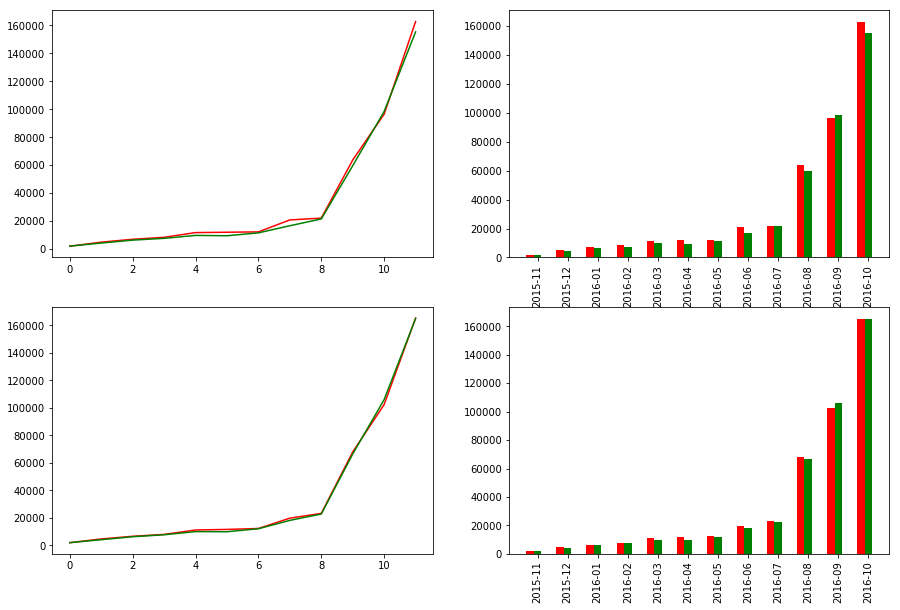

In [7]:
fig, subplot_arr = plt.subplots(2,2, figsize=(15,10))

#原始数据趋势展示
subplot_arr[0,0].plot(raw_cliton_sum, color='r')
subplot_arr[0,0].plot(raw_trump_sum, color='g')

width = 0.25
x = np.arange(len(months))
subplot_arr[0,1].bar(x, raw_cliton_sum, width, color='r')
subplot_arr[0,1].bar(x + width, raw_trump_sum, width, color='g')
subplot_arr[0,1].set_xticks(x + width)
subplot_arr[0,1].set_xticklabels(months, rotation='vertical')

#调整数据趋势展示
subplot_arr[1,0].plot(adj_cliton_sum, color='r')
subplot_arr[1,0].plot(adj_trump_sum, color='g')

width = 0.25
x = np.arange(len(months))
subplot_arr[1,1].bar(x, adj_cliton_sum,width, color='r')
subplot_arr[1,1].bar(x + width, adj_trump_sum, width, color='g')
subplot_arr[1,1].set_xticks(x + width)
subplot_arr[1,1].set_xticklabels(months, rotation='vertical')

plt.subplots_adjust(wspace=0.2)

plt.show()